Найдено 29 частых наборов товаров.
Правила ассоциации не найдены. Попробуйте уменьшить min_support или min_threshold.


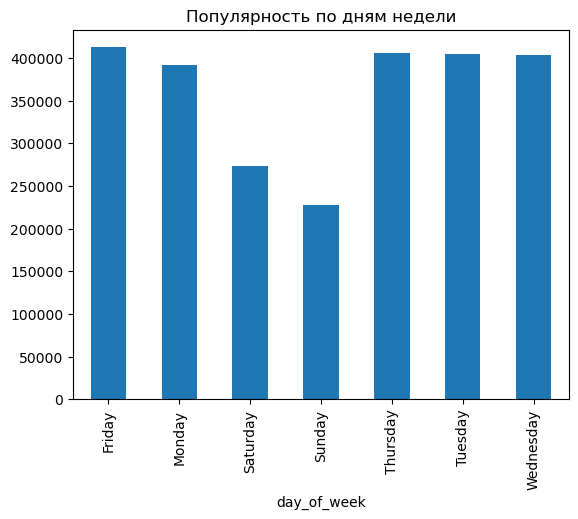

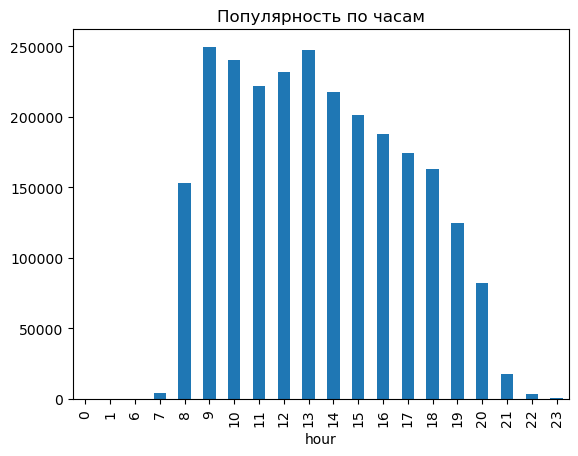

Популярные товары по дням недели:
entity_id    0     1     2     3     13    14    15    16    17    18    ...  \
day_of_week                                                              ...   
Friday          2     1     0     0     3     4     1     1     1     0  ...   
Monday          4     0     0     0     4     1     0     0     1     1  ...   
Saturday        1     1     2     0     3     7     1     0     2     1  ...   
Sunday          1     0     2     0     3     0     0     0     1     1  ...   
Thursday        2     1     2     0     2     5     0     3     0     3  ...   

entity_id    1600  1601  1602  1603  1604  1606  1636  1637  1638  1639  
day_of_week                                                              
Friday        166     2     4     5     4     0     1     0     1     1  
Monday        126     5     6     6     7     8     0     1     0     3  
Saturday      111     1     3     2     4     1     0     0     2     1  
Sunday         83     4     1     1

In [129]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt


data = pd.read_csv('hakaton.csv', sep=';')
data['create_datetime'] = pd.to_datetime(data['create_datetime'])
# Преобразуем create_datetime в datetime формат
data['day_of_week'] = data['create_datetime'].dt.day_name()
data['hour'] = data['create_datetime'].dt.hour
data['day_of_month'] = data['create_datetime'].dt.day

# Анализ совместных покупок товаров
basket = data.groupby(['order_id', 'entity_id']).size().unstack(fill_value=0).astype(bool)

# Применяем алгоритм Apriori для поиска частых наборов товаров
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
if frequent_itemsets.empty:
    print("Не найдено частых наборов товаров. Попробуйте уменьшить min_support.")
else:
    print(f"Найдено {len(frequent_itemsets)} частых наборов товаров.")

    # Генерация правил ассоциации
    # Применяем алгоритм Apriori для поиска частых наборов товаров
    frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

    # Get the total number of itemsets
    num_itemsets = len(frequent_itemsets)

    # Pass num_itemsets to association_rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)
    if rules.empty:
        print("Правила ассоциации не найдены. Попробуйте уменьшить min_support или min_threshold.")
    else:
        # Проверка наличия колонки 'lift'
        if 'lift' in rules.columns:
            # Сортируем правила по значению lift
            rules = rules.sort_values(by='lift', ascending=False)

            # Функция для рекомендаций на основе правил ассоциации
            def recommend_products(item_id, rules, top_n=5):
                recommendations = rules[rules['antecedents'].apply(lambda x: item_id in x)]
                return recommendations.sort_values(by='lift', ascending=False).head(top_n)[['consequents', 'lift']]

            # Пример: Рекомендации для товара с ID 13
            recommendations_for_13 = recommend_products(13, rules)

            print("\nРекомендации для товара 13:")
            print(recommendations_for_13)
        else:
            print("Колонка 'lift' отсутствует в результатах. Проверьте входные данные.")

# Анализ покупок по временным интервалам
popular_by_day = data.groupby(['day_of_week', 'entity_id']).size().unstack(fill_value=0)
popular_by_hour = data.groupby(['hour', 'entity_id']).size().unstack(fill_value=0)

# Выделение любимых товаров каждого пользователя
favorite_items = data.groupby(['customer_id', 'entity_id']).size().reset_index(name='count')
favorite_items = favorite_items.sort_values(['customer_id', 'count'], ascending=[True, False])

# Визуализация популярности товаров по дням недели
popular_by_day.sum(axis=1).plot(kind='bar', title='Популярность по дням недели')
plt.show()

# Визуализация популярности товаров по часам
popular_by_hour.sum(axis=1).plot(kind='bar', title='Популярность по часам')
plt.show()

# Вывод результатов
print("Популярные товары по дням недели:")
print(popular_by_day.head())

print("\nЛюбимые товары каждого пользователя:")
print(favorite_items.head())


In [135]:
popular_by_day

entity_id,0,1,2,3,13,14,15,16,17,18,...,1600,1601,1602,1603,1604,1606,1636,1637,1638,1639
day_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,2,1,0,0,3,4,1,1,1,0,...,166,2,4,5,4,0,1,0,1,1
Monday,4,0,0,0,4,1,0,0,1,1,...,126,5,6,6,7,8,0,1,0,3
Saturday,1,1,2,0,3,7,1,0,2,1,...,111,1,3,2,4,1,0,0,2,1
Sunday,1,0,2,0,3,0,0,0,1,1,...,83,4,1,1,2,4,0,2,0,0
Thursday,2,1,2,0,2,5,0,3,0,3,...,122,3,4,8,13,2,0,1,0,6
Tuesday,0,0,2,1,1,3,3,1,1,0,...,144,1,3,11,5,0,0,0,0,3
Wednesday,4,2,0,0,3,6,1,7,2,3,...,175,6,5,7,8,0,0,0,0,5


In [134]:
favorite_items

,customer_id,entity_id,count
32,9170,541,39
10,9170,96,9
33,9170,542,7
3,9170,16,6
9,9170,92,6
...,...,...,...
834031,179239,536,1
834032,179239,541,1
834033,179241,476,1
834034,179241,552,1
